# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 본인의 구글 드라이브에 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Argumentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)


## 1.환경설정 

### (1) 데이터셋 폴더 생성
- **세부요구사항**
    - C드라이브에 Datasets라는 폴더를 만드세요.
        - 구글드라이브를 사용하는경우 드라이브 첫 화면에 Datasets 라는 폴더를 만드세요. ('/content/drive/MyDrive/Datasets/')
    - 해당 폴더 안에 Car_Images.zip 파일을 넣으세요.

* 구글 Colab을 이용하는 경우

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 데이터셋 불러오기 
- **세부요구사항**
    - Car_Images.zip 파일을 C:/Datasets/ 경로에 압축 해제합니다.
    - zipfile 모듈을 이용하거나 다른 방식을 사용해도 됩니다.
        - 참고 자료 : [zipfile document](https://docs.python.org/3/library/zipfile.html#zipfile-objects)
    - 폴더구조(로컬)
        * C:/Datasets/ : 압축파일
        * C:/Datasets/Car_Images_train/ : 압축 해제한 이미지 저장소
    - 폴더구조(구글드라이브브)
        * /content/drive/MyDrive/Datasets/ : 압축파일
        * /content/drive/MyDrive/Datasets/Car_Images_train/ : 압축 해제한 이미지 저장소
    - 압축을 해제하면 다음과 같은 두 하위 폴더가 생성됩니다.
        * normal, abnormal : 각 폴더에는 이미지들이 있습니다.
        * 이후 단계에서 해당 경로로 부터 validation, test 셋을 추출하게 됩니다.
        

In [2]:
import zipfile

In [3]:
# 압축파일 경로
# 구글 드라이브인 경우 경로에 맞게 지정하세요.
dataset_path  = '/content/drive/MyDrive/Datasets/'
# dataset_path = 'C:/Datasets/'

file_path = dataset_path + 'Car_Images.zip'

In [ ]:
# 압축 해제
# data = zipfile.ZipFile(file_path)
# data.extrall

### (3) 이미지 저장을 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 을 위해 각각 하위 폴더 normal과 abnormal를 준비합니다.
        - train
            * 정상 이미지 저장소 : C:/Datasets/Car_Images_train/normal/ 
                * 구글드라이브 :   /content/drive/MyDrive/Datasets/Car_Images_train/normal/
            * 파손 이미지 저장소 : C:/Datasets/Car_Images_train/abnormal/
                * 구글드라이브 : /content/drive/MyDrive/Datasets/Car_Images_train/abnormal/
        - val, test 역시 동일한 구조로 생성합니다.
    - 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
        - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [4]:

# 각각 경로 지정
tr_n_path =  "/content/drive/MyDrive/Datasets/Car_Images_train/normal/"
tr_ab_path = "/content/drive/MyDrive/Datasets/Car_Images_train/abnormal/"

# train 폴더는 압축을 해제하면서 이미 생성 되어 있습니다.

# test 폴더 만들기 os.mkdir()
# !mkdir /content/drive/MyDrive/Datasets/Car_Images_test/
# !mkdir /content/drive/MyDrive/Datasets/Car_Images_test/normal/
# !mkdir /content/drive/MyDrive/Datasets/Car_Images_test/abnormal/
# # validation 폴더 만들기
# !mkdir /content/drive/MyDrive/Datasets/Car_Images_val/
# !mkdir /content/drive/MyDrive/Datasets/Car_Images_val/normal/
# !mkdir /content/drive/MyDrive/Datasets/Car_Images_val/abnormal/


## 2.데이터 전처리

### (1) 데이터 분할 : Training set | Validation set | Test set 생성
- **세부요구사항**
    - Training set, Validation set, Test set을 만듭니다.
        * size
            * test : 전체에서 20%를 추출합니다.
            * validation : test를 떼어낸 나머지에서 다시 20%를 추출합니다.
        * 데이터는 랜덤하게 추출해야 합니다.
            - random, shutil 모듈을 이용하여 랜덤하게 추출할 수 있습니다.
                - [random document](https://docs.python.org/3/library/random.html) | [shutil document](https://docs.python.org/3/library/shutil.html)
            * 해당 모듈 이외에 자신이 잘 알고 있는 방법을 사용해도 됩니다.
---

#### 1) test, validation 크기를 지정

In [5]:
import random, shutil, os

In [ ]:
# os.listdir(tr_n_path)

In [ ]:
# 전체 이미지 갯수를 확인합니다.
# len(os.listdir(tr_n_path)) , len(os.listdir(tr_ab_path))

(194, 194)

In [ ]:
# test 사이즈 : 전체 이미지의 20%
# te_data_num = [round(len(os.listdir(tr_n_path))*0.2), round(len(os.listdir(tr_ab_path))*0.2)]
# print(te_data_num)

# validation 사이즈 : test를 제외한 나머지 중에서 20%
# val_data_num = [ round((len(os.listdir(tr_n_path))-te_data_num[0])*0.2) , round((len(os.listdir(tr_ab_path))-te_data_num[1])*0.2) ]
# print(val_data_num)

# train 사이즈
# train_data_num = [len(os.listdir(tr_n_path)) - te_data_num[0] - val_data_num[0],
                #   len(os.listdir(tr_ab_path))- te_data_num[1] - val_data_num[1]]
# print(train_data_num)

[39, 39]
[31, 31]
[124, 124]


#### 2) test 셋 추출

In [ ]:
# random.seed(2023)
# rand_nor = random.sample(os.listdir(tr_n_path),60)
# rand_ab = random.sample(os.listdir(tr_ab_path),61)


In [ ]:
# train_nor = os.listdir(tr_n_path)
# train_ab = os.listdir(tr_ab_path)
# for i in rand_nor:
#     train_nor.remove(i)
# for i in rand_ab:
#     train_ab.remove(i)

In [ ]:
# for i in rand_nor:
#     shutil.move(f"/content/drive/MyDrive/Datasets/Car_Images_train/normal/{i}",'/content/drive/MyDrive/Datasets/Car_Images_test/normal/')
# for i in rand_ab:
#     shutil.move(f"/content/drive/MyDrive/Datasets/Car_Images_train/abnormal/{i}",'/content/drive/MyDrive/Datasets/Car_Images_test/abnormal/')

In [ ]:
# 추출 후 이미지 갯수 확인
# print(len(os.listdir('/content/drive/MyDrive/Datasets/Car_Images_test/normal/')))
# print(len(os.listdir('/content/drive/MyDrive/Datasets/Car_Images_test/abnormal/')))

60
61


#### 3) validation 셋 추출

In [ ]:
# random.seed(2023)
# val_nor = random.sample(train_nor,48)
# val_ab = random.sample(train_ab,48)

# for i in val_nor:
#     train_nor.remove(i)
# for i in val_ab:
#     train_ab.remove(i)

In [ ]:
# for i in val_nor:
#     shutil.move(f"/content/drive/MyDrive/Datasets/Car_Images_train/normal/{i}",'/content/drive/MyDrive/Datasets/Car_Images_val/normal/')
# for i in val_ab:
#     shutil.move(f"/content/drive/MyDrive/Datasets/Car_Images_train/abnormal/{i}",'/content/drive/MyDrive/Datasets/Car_Images_val/abnormal/')

In [ ]:
# 추출 후 이미지 갯수 확인
# print(len(os.listdir('/content/drive/MyDrive/Datasets/Car_Images_val/normal/')))
# print(len(os.listdir('/content/drive/MyDrive/Datasets/Car_Images_val/abnormal/')))

48
48


In [ ]:
# len(os.listdir(tr_n_path)) , len(os.listdir(tr_ab_path))

(194, 194)

### (2) 데이터 복사 및 이동
- **세부요구사항**
    - 분할된 데이터를 복사 이동합니다.
        - 새로운 폴더에 저장하는 데이터로 "3.모델링I"에서 사용합니다.
        - 기존 폴더는 "4.모델링II > (1) Data Augmentation"에서 사용합니다.
    - Training set | Validation set | Test set의 데이터를 **새로운 폴더**에 복사하세요.
        - 새로운 폴더 명
            * copy_images/trainset
            * copy_images/validset
            * copy_images/testset
        - 새로운 폴더에는 normal, abnormal 파일 모두를 복사합니다. 
            * 파일을 구분하기 위해 abnormal 파일들은 파일명 앞에 접두사 'ab_'를 붙입시다.
        - os, shutil 모듈을 활용하세요.

#### 1) abnormal 파일 복사

* 복사하기 : shutil.copytree()

In [ ]:
# !mkdir '/content/drive/MyDrive/Datasets/copy_images'
# !mkdir '/content/drive/MyDrive/Datasets/copy_images/trainset/'
# !mkdir '/content/drive/MyDrive/Datasets/copy_images/validset/'
# !mkdir '/content/drive/MyDrive/Datasets/copy_images/testset/'


In [ ]:
# for i in os.listdir(tr_ab_path):
#     os.rename(tr_ab_path+i,tr_ab_path+"ab_"+i)

In [ ]:
# for i in os.listdir('/content/drive/MyDrive/Datasets/Car_Images_val/abnormal/'):
#     os.rename('/content/drive/MyDrive/Datasets/Car_Images_val/abnormal/'+i,'/content/drive/MyDrive/Datasets/Car_Images_val/abnormal/'+"ab_"+i)
# for i in os.listdir('/content/drive/MyDrive/Datasets/Car_Images_test/abnormal/'):
#     os.rename('/content/drive/MyDrive/Datasets/Car_Images_test/abnormal/'+i,'/content/drive/MyDrive/Datasets/Car_Images_test/abnormal/'+"ab_"+i)

In [ ]:
# shutil.copytree(tr_n_path,'/content/drive/MyDrive/Datasets/copy_images/trainset',dirs_exist_ok=True)
# shutil.copytree(tr_ab_path,'/content/drive/MyDrive/Datasets/copy_images/trainset',dirs_exist_ok=True)
# shutil.copytree('/content/drive/MyDrive/Datasets/Car_Images_val/normal/','/content/drive/MyDrive/Datasets/copy_images/validset',dirs_exist_ok=True)
# shutil.copytree('/content/drive/MyDrive/Datasets/Car_Images_val/abnormal/','/content/drive/MyDrive/Datasets/copy_images/validset',dirs_exist_ok=True)
# shutil.copytree('/content/drive/MyDrive/Datasets/Car_Images_test/normal/','/content/drive/MyDrive/Datasets/copy_images/testset',dirs_exist_ok=True)
# shutil.copytree('/content/drive/MyDrive/Datasets/Car_Images_test/abnormal/','/content/drive/MyDrive/Datasets/copy_images/testset',dirs_exist_ok=True)

* abnormal 이미지 이름의 접두어 "ab_" 붙이기 : os.rename

#### 2) normal 파일 복사

* 데이터 갯수 조회

In [ ]:
# print(len(os.listdir(dataset_path+'copy_images/trainset/')))
# print(len(os.listdir(dataset_path+'copy_images/validset/')))
# print(len(os.listdir(dataset_path+'copy_images/testset/')))

388
96
121


## 3.모델링 I
* **세부요구사항**
    * 모델링을 위한 데이터 구조 만들기
        * x : 이미지를 array로 변환합니다.
        * y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# mcp = ModelCheckpoint(filepath='/content/drive/MyDrive/Datasets/model_save.h5/',
#                       monitor='val_loss',
#                       verbose=1,
#                       save_best_only=True,
#                       save_weights_only=False)

### (1) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다. 
    * 이미지 파일을 불러와 train, valid, test 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

#### 1) 이미지 목록 만들기
* train, validation, test 폴더로 부터 이미지 목록을 생성합니다.

In [7]:
# 이미지 목록 저장
img_train_list = os.listdir(dataset_path+'copy_images/trainset/')
img_valid_list = os.listdir(dataset_path+'copy_images/validset/')
img_test_list = os.listdir(dataset_path+'copy_images/testset/')

In [8]:
# 메모리, 처리시간을 위해서 이미지 크기 조정
img_size = 280 ## 사이즈 조정 가능

In [9]:
images = []

for path in img_train_list:
    img = keras.utils.load_img('/content/drive/MyDrive/Datasets/copy_images/trainset/'+ path, target_size=(img_size,img_size))
    img = keras.utils.img_to_array(img)
    images.append(img)
images_arr = np.array(images)
images_arr.shape

(388, 280, 280, 3)

In [10]:
images_val = []

for path in img_valid_list:
    img = keras.utils.load_img('/content/drive/MyDrive/Datasets/copy_images/validset/'+ path, target_size=(img_size,img_size))
    img = keras.utils.img_to_array(img)
    images_val.append(img)
images_val_arr = np.array(images_val)
images_val_arr.shape

(96, 280, 280, 3)

In [11]:
images_test = []

for path in img_test_list:
    img = keras.utils.load_img('/content/drive/MyDrive/Datasets/copy_images/testset/'+ path, target_size=(img_size,img_size))
    img = keras.utils.img_to_array(img)
    images_test.append(img)
images_test_arr = np.array(images_test)
images_test_arr.shape

(121, 280, 280, 3)

#### 2) 이미지들을 배열 데이터셋으로 만들기

### (2) y : 클래스 만들기
- **세부요구사항**
    - Training set / Validation set / Test set의 y를 생성합니다.
        - 각각 normal, abnormal 데이터의 갯수를 다시 확인하고
        - normal을 0, abnormal을 1로 지정합니다.

In [ ]:
# 데이터 갯수 확인
print( len(img_train_list) )
print( len([val for val in img_train_list if val.startswith('ab_')]) )
print('---')
print( len(img_valid_list) )
print( len([val for val in img_valid_list if val.startswith('ab_')]) )
print('---')
print( len(img_test_list) )
print( len([val for val in img_test_list if val.startswith('ab_')]) )

388
194
---
96
48
---
121
61


* y_train, y_valid, y_test 만들기
    * normal, abnormal 데이터의 갯수를 다시 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [12]:
y_train=[]
for val in img_train_list:
    if val.startswith('ab_'):
        y_train.append(1)
    else:
        y_train.append(0)
# print(y_train)
y_train = np.array(y_train)
# print(y_train)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
y_valid=[]
for val in img_valid_list:
    if val.startswith('ab_'):
        y_valid.append(1)
    else:
        y_valid.append(0)
y_valid = np.array(y_valid)
y_valid

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
y_test=[]
for val in img_test_list:
    if val.startswith('ab_')==True:
        y_test.append(1)
    else:
        y_test.append(0)
y_test = np.array(y_test)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# y_test1 = np.flip(y_test)

In [16]:
y_test1 = np.where(y_test==0,1,0)
y_test1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
list(y_test).count(0)+list(y_train).count(0)+list(y_valid).count(0)

302

### (3) 모델1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [19]:
min_x = images_arr.min()
max_x = images_arr.max()

In [20]:
x_train = (images_arr-min_x)/(max_x-min_x)
x_valid = (images_val_arr-min_x)/(max_x-min_x)
x_test = (images_test_arr-min_x)/(max_x-min_x)

In [21]:
x_train.shape, x_train.min(),x_train.max()

((388, 280, 280, 3), 0.0, 1.0)

In [22]:
x_valid.shape, x_valid.min(),x_valid.max()

((96, 280, 280, 3), 0.0, 1.0)

In [23]:
x_test.shape, x_test.min(),x_test.max()

((121, 280, 280, 3), 0.0, 1.0)

In [ ]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(280,280,3))
cl = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(il)
bl = keras.layers.BatchNormalization()(cl)
cl2 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(bl)
bl2 = keras.layers.BatchNormalization()(cl2)
pl = keras.layers.MaxPool2D(pool_size=(2,2),padding="same")(bl2)

cl3 = keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(pl)
bl3 = keras.layers.BatchNormalization()(cl3)
cl4 = keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(bl3)
bl4 = keras.layers.BatchNormalization()(cl4)
pl2 = keras.layers.MaxPool2D(pool_size=(2,2),padding="same")(bl4)

cl5 = keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(pl2)
bl5 = keras.layers.BatchNormalization()(cl5)
cl6 = keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(bl5)
bl6 = keras.layers.BatchNormalization()(cl6)
cl7 = keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(bl6)
bl7 = keras.layers.BatchNormalization()(cl7)
pl3 = keras.layers.MaxPool2D(pool_size=(2,2),padding="same")(bl7)

cl8 = keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(pl3)
bl8 = keras.layers.BatchNormalization()(cl8)
cl9 = keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(bl8)
bl9 = keras.layers.BatchNormalization()(cl9)
cl10 = keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(bl9)
bl10 = keras.layers.BatchNormalization()(cl10)
pl4 = keras.layers.MaxPool2D(pool_size=(2,2),padding="same")(bl10)

cl11 = keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(pl4)
bl11 = keras.layers.BatchNormalization()(cl11)
cl12 = keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(bl11)
bl12 = keras.layers.BatchNormalization()(cl12)
cl13 = keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(bl12)
bl13 = keras.layers.BatchNormalization()(cl13)
pl5 = keras.layers.MaxPool2D(pool_size=(2,2),padding="same")(bl13)
fl = keras.layers.Flatten()(pl5)

hl = keras.layers.Dense(4096,activation="relu")(fl)
bl14 = keras.layers.BatchNormalization()(hl)
dl = keras.layers.Dropout(0.2)(bl14)
hl2 = keras.layers.Dense(4096,activation="relu")(dl)
bl15 = keras.layers.BatchNormalization()(hl2)
dl2 = keras.layers.Dropout(0.2)(bl15)
hl3 = keras.layers.Dense(4096,activation="relu")(dl2)
bl16 = keras.layers.BatchNormalization()(hl3)
dl3 = keras.layers.Dropout(0.2)(bl16)

ol = keras.layers.Dense(1,activation="sigmoid")(dl3)

model = keras.models.Model(il,ol)

model.compile(loss=keras.losses.binary_crossentropy,metrics=["accuracy"],optimizer="adam")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 280, 280, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 280, 280, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 140, 140, 64)     0     

#### 2) 학습
* EarlyStopping 설정하고 학습시키기

In [28]:
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   patience=12,
                   verbose=1,
                   restore_best_weights=True)
lr = ReduceLROnPlateau(monitor="val_loss",
                       patience=5,
                       factor=0.35,
                       verbose=1,
                       min_lr=0.0000001)


In [ ]:
model.fit(x_train,y_train,validation_data=(x_valid,y_valid),callbacks=[es,lr],verbose=1,epochs=100,batch_size=8)

Epoch 1/100
49/49 [==============================] - 21s 374ms/step - loss: 2.9578 - accuracy: 0.6959 - val_loss: 288.1179 - val_accuracy: 0.5104 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 16s 320ms/step - loss: 0.6266 - accuracy: 0.7165 - val_loss: 38.6942 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 16s 324ms/step - loss: 0.6317 - accuracy: 0.7732 - val_loss: 26.7942 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 15s 312ms/step - loss: 0.5399 - accuracy: 0.7912 - val_loss: 15.2839 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
49/49 [==============================] - 15s 312ms/step - loss: 0.4873 - accuracy: 0.8041 - val_loss: 1.1654 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/100
49/49 [==============================] - 15s 298ms/step - loss: 0.5338 - accuracy: 0.8067 - val_loss: 7.0798 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/100
49/49 [==============================] - 

#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 278ms/step - loss: 0.4988 - accuracy: 0.7686


[0.49880796670913696, 0.7685950398445129]

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>=0.5,1,0)

4/4 [==============================] - 1s 236ms/step


In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[44 16]
 [12 49]]
0.8032786885245902
0.7777777777777778
0.768595041322314


### (4) 모델2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 280 ## 사이즈 조정 가능

train_path = dataset_path+'Car_Images_train/'
valid_path = dataset_path+'Car_Images_val/'
test_path = dataset_path+'Car_Images_test/'

train_datagen = ImageDataGenerator(rotation_range=30,      
                         width_shift_range=0.25,  
                         height_shift_range=0.25, 
                         zoom_range=0.2,        
                         shear_range=0.2,        
                         horizontal_flip=True,   
                         vertical_flip=True,
                         rescale = 1/255,     
                         fill_mode='nearest')
    
valid_datagen = ImageDataGenerator(rotation_range=30,      
                         width_shift_range=0.25,  
                         height_shift_range=0.25,
                         zoom_range=0.2,         
                         shear_range=0.2,       
                         horizontal_flip=True,   
                         vertical_flip=True,
                         rescale = 1/255,            
                         fill_mode='nearest')    

train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    target_size=(280,280),
                                                    class_mode="binary",
                                                    batch_size=8,
                                                    shuffle=True)

valid_generator = valid_datagen.flow_from_directory(directory=valid_path,
                                                    target_size=(280,280),
                                                    class_mode="binary",
                                                    batch_size=8,
                                                    shuffle=False)


Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [ ]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(280,280,3))
cl = keras.layers.Conv2D(filters=32,kernel_size=(2,2),strides=(2,2),padding="same",activation="relu")(il)
bl = keras.layers.BatchNormalization()(cl)
cl2 = keras.layers.Conv2D(filters=32,kernel_size=(2,2),padding="valid",activation="relu")(bl)
bl2 = keras.layers.BatchNormalization()(cl2)
cl3 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(bl2)
bl3 = keras.layers.BatchNormalization()(cl3)
pl = keras.layers.MaxPool2D(pool_size=(2,2))(bl3)
cl4 = keras.layers.Conv2D(filters=80,kernel_size=(3,3),padding="same",activation="relu")(pl)
bl4 = keras.layers.BatchNormalization()(cl4)
cl5 = keras.layers.Conv2D(filters=192,kernel_size=(2,2),padding="valid",activation="relu")(bl4)
pl2 = keras.layers.MaxPool2D(pool_size=(2,2))(cl5)

a = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(pl2)
a2 = keras.layers.BatchNormalization()(a)
a3 = keras.layers.Conv2D(filters=96,kernel_size=(3,3),padding="same",activation="relu")(a2)
a4 = keras.layers.BatchNormalization()(a3)
a5 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(a4)
a6 = keras.layers.BatchNormalization()(a5)

b = keras.layers.Conv2D(filters=48,kernel_size=(3,3),padding="same",activation="relu")(pl2)
b2 = keras.layers.BatchNormalization()(b)
b3 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(b2)
b4 = keras.layers.BatchNormalization()(b3)

c = keras.layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding="same")(pl2)
c2 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(c)
c3 = keras.layers.BatchNormalization()(c2)

d = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(pl2)
d2 = keras.layers.BatchNormalization()(d)

Add = keras.layers.Add()([a6,b4,c3,d2])
con = keras.layers.Concatenate()([a6,b4,c3,d2])

con2 = keras.layers.Concatenate()([Add,con])

aver = keras.layers.GlobalAveragePooling2D()(con2)

ol = keras.layers.Dense(1,activation = "sigmoid")(aver)



model = keras.models.Model(il,ol)
model.compile(loss=keras.losses.binary_crossentropy,metrics=["accuracy"],optimizer="adam")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 280, 280, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 140, 140, 32  416         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 140, 140, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

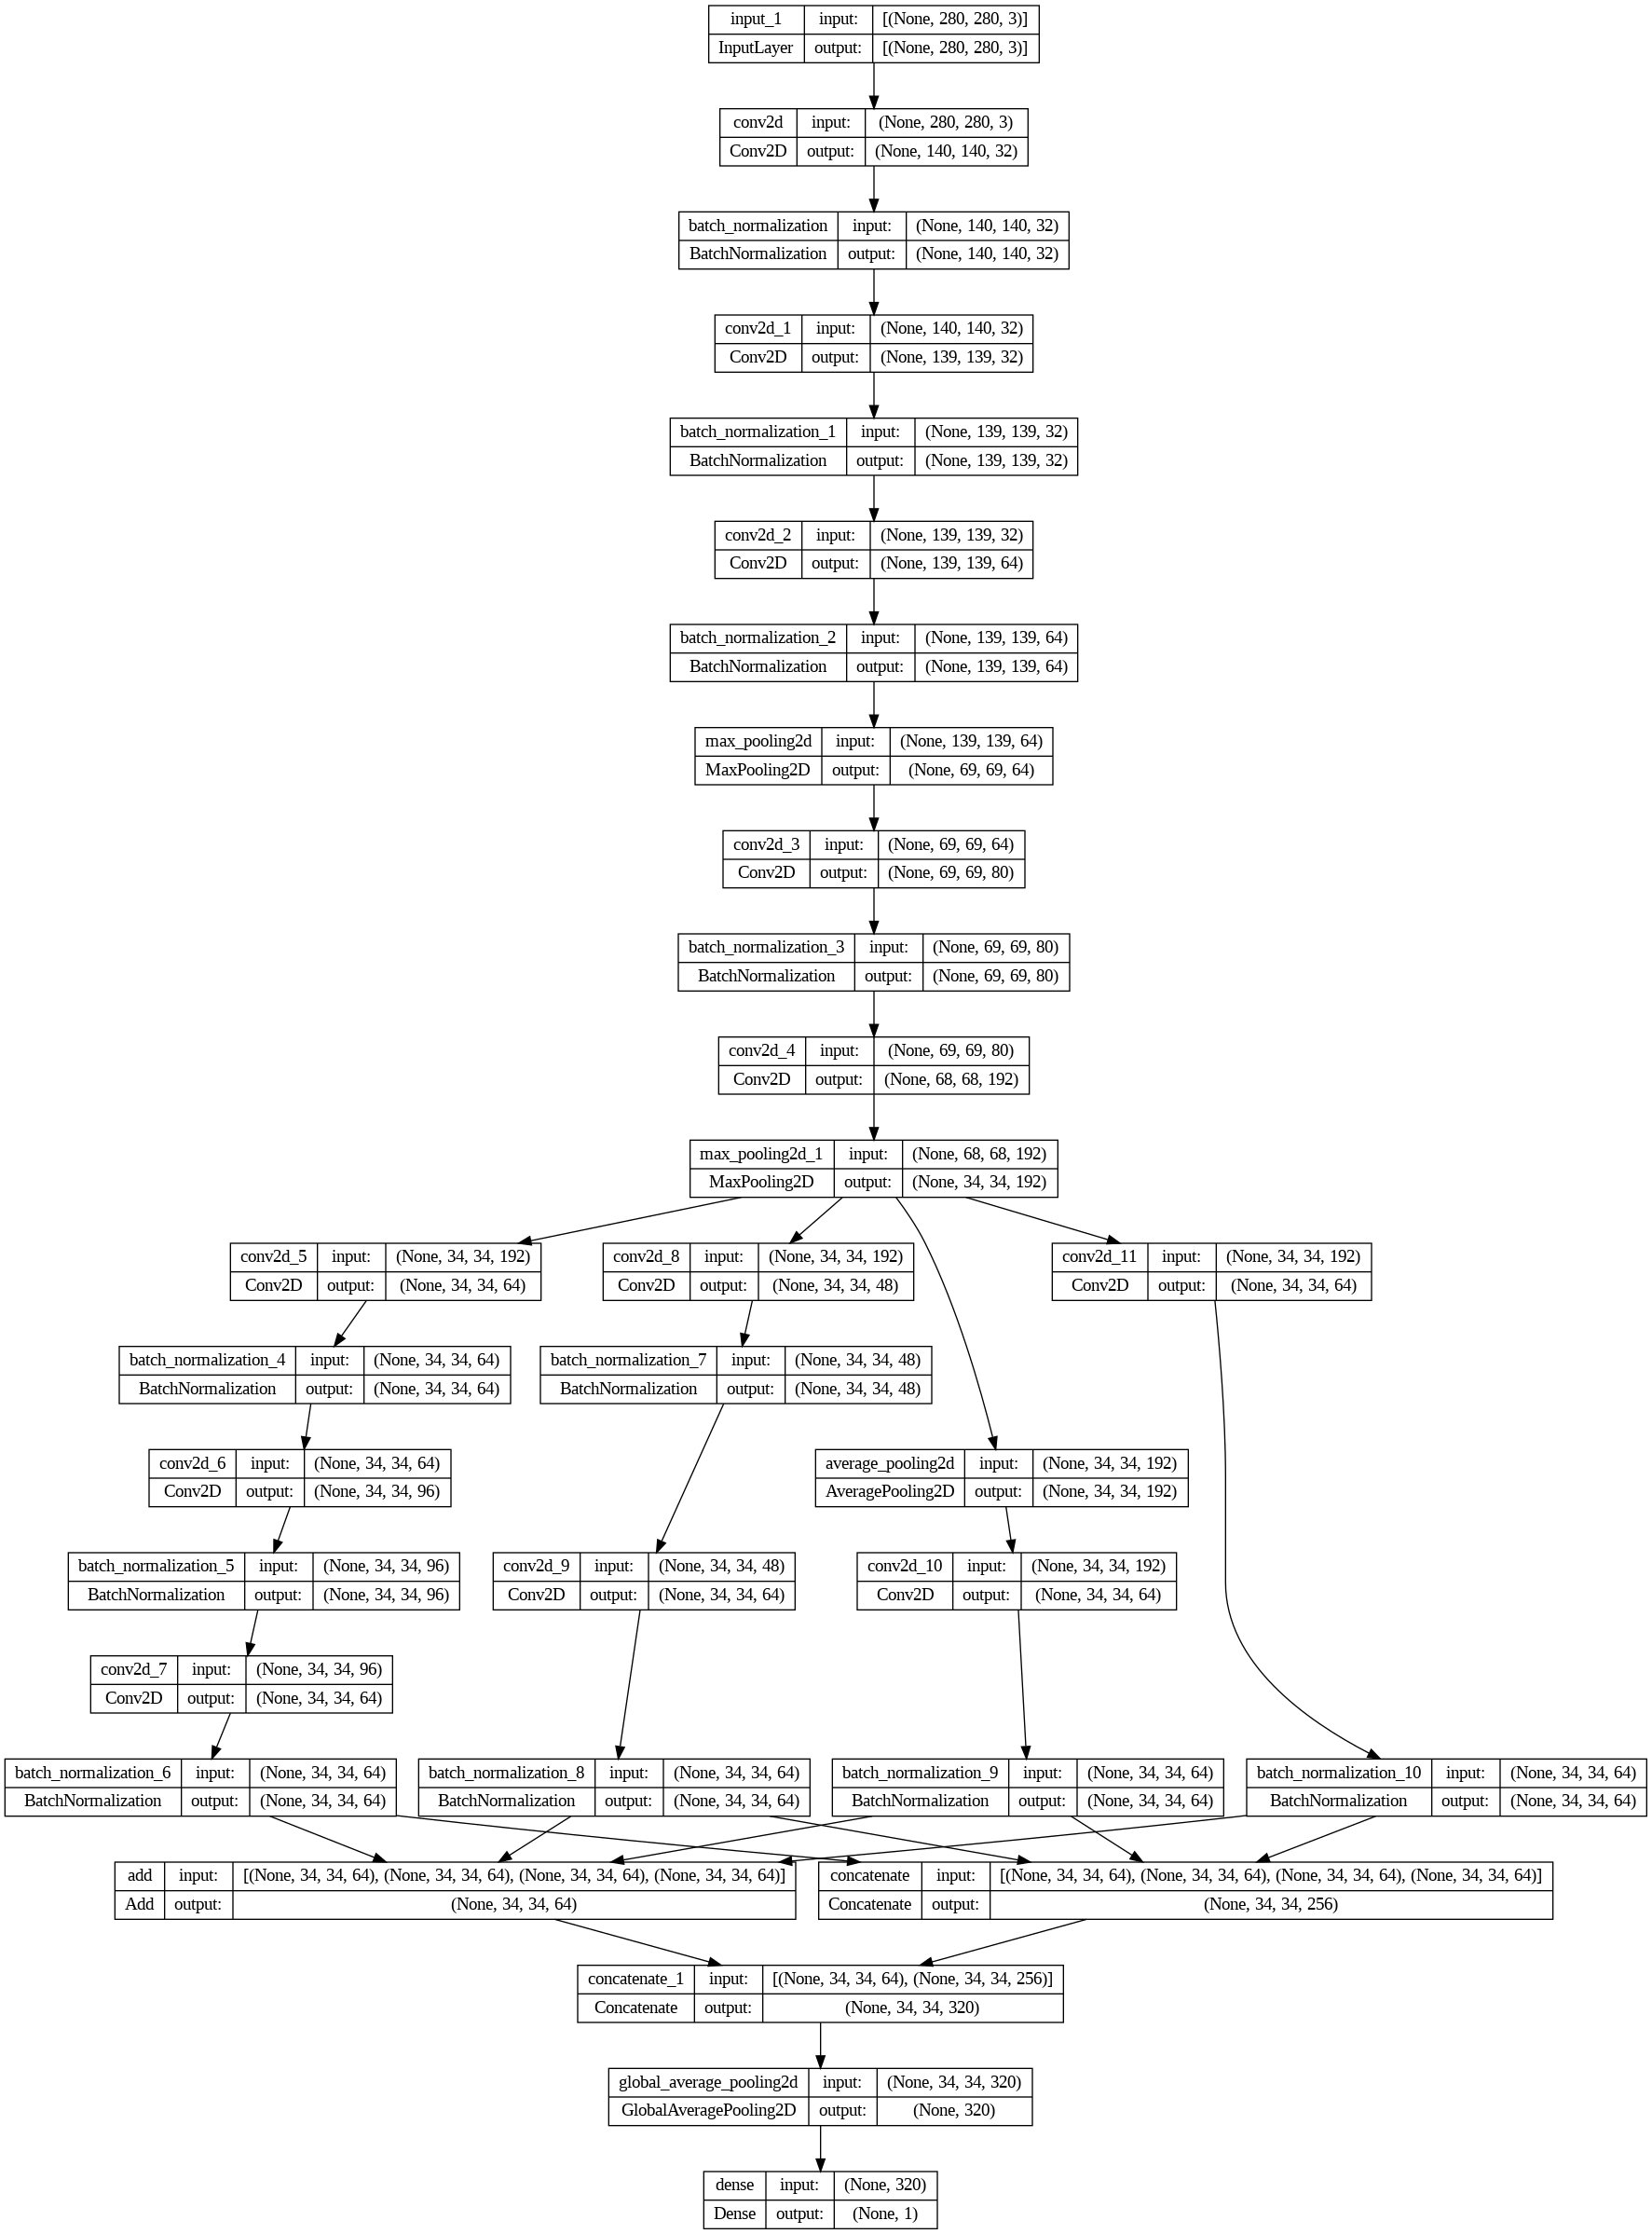

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

#### 2) 학습
* EarlyStopping 설정하고 학습시키기

In [ ]:
model.fit(x_train,y_train,validation_data=(x_valid,y_valid),callbacks=[es,lr],verbose=1,epochs=1000,batch_size=8)

Epoch 1/1000
49/49 [==============================] - 12s 60ms/step - loss: 0.5794 - accuracy: 0.7629 - val_loss: 1.2704 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/1000
49/49 [==============================] - 2s 46ms/step - loss: 0.4673 - accuracy: 0.7990 - val_loss: 1.1330 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/1000
49/49 [==============================] - 2s 43ms/step - loss: 0.4183 - accuracy: 0.8351 - val_loss: 1.7004 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/1000
49/49 [==============================] - 2s 43ms/step - loss: 0.4213 - accuracy: 0.8041 - val_loss: 1.4770 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/1000
49/49 [==============================] - 2s 48ms/step - loss: 0.4137 - accuracy: 0.8170 - val_loss: 2.5092 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/1000
49/49 [==============================] - 2s 50ms/step - loss: 0.4020 - accuracy: 0.8505 - val_loss: 2.2675 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/1000
49/49 [==============================] - 2s 44ms/s

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 1s 65ms/step - loss: 0.4265 - accuracy: 0.8843


[0.4265218675136566, 0.8842975497245789]

In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score
y_pred1 = model.predict(x_test)
y_pred1 = np.where(y_pred1>=0.5,1,0)

4/4 [==============================] - 0s 56ms/step


In [ ]:
print(confusion_matrix(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[56  4]
 [10 51]]
0.8360655737704918
0.8793103448275862
0.8842975206611571


In [ ]:
y_valid1 = np.where(y_valid==0,1,0)

In [ ]:
model.fit(train_generator,validation_data=(x_valid,y_valid1),callbacks=[es,lr],verbose=1,epochs=100)

Epoch 1/100
49/49 [==============================] - 29s 437ms/step - loss: 0.5983 - accuracy: 0.6985 - val_loss: 0.9274 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 21s 438ms/step - loss: 0.5109 - accuracy: 0.7500 - val_loss: 1.9622 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 20s 415ms/step - loss: 0.4631 - accuracy: 0.7938 - val_loss: 1.9845 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 22s 440ms/step - loss: 0.4840 - accuracy: 0.7706 - val_loss: 3.2577 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
49/49 [==============================] - ETA: 0s - loss: 0.4729 - accuracy: 0.7887
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.
49/49 [==============================] - 21s 430ms/step - loss: 0.4729 - accuracy: 0.7887 - val_loss: 2.2368 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/100
49/49 [==============================] - 21

In [ ]:
y_test1 = np.where(y_test==0,1,0)

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 61ms/step - loss: 0.9315 - accuracy: 0.4959


[0.9314847588539124, 0.4958677589893341]

#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score
y_pred1 = model.predict(x_test)
y_pred1 = np.where(y_pred1>=0.5,1,0)
# y_test1 = np.where(y_test==0,1,0)

4/4 [==============================] - 0s 53ms/step


In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score
print(confusion_matrix(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[60  0]
 [61  0]]
0.0
0.0
0.49586776859504134


In [ ]:
import numpy as np
n

### (5) 모델3
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

#### 1) 구조 설계

In [ ]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

In [ ]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(280,280,3))
cl = keras.layers.Conv2D(filters = 32,kernel_size=(3,3),padding="same",activation="relu")(il)
pl = keras.layers.AveragePooling2D(pool_size=(2,2),padding="same")(cl)
bl = keras.layers.BatchNormalization()(pl)

cl2 = keras.layers.Conv2D(filters = 64,kernel_size=(3,3),padding="same",activation="relu")(bl)
pl2 = keras.layers.AveragePooling2D(pool_size=(2,2),padding="same")(cl2)
bl2 = keras.layers.BatchNormalization()(pl2)

cl3 = keras.layers.Conv2D(filters = 128,kernel_size=(3,3),padding="same",activation="relu")(bl2)
pl3 = keras.layers.AveragePooling2D(pool_size=(2,2),padding="same")(cl3)
bl3 = keras.layers.BatchNormalization()(pl3)


a = keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(bl3)
a2 = keras.layers.AveragePooling2D(pool_size=(2,2),padding="same")(a)
a3 = keras.layers.BatchNormalization()(a2)
a3 = keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="swish")(a3)
a3 = keras.layers.BatchNormalization()(a3)

b = keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(bl3)
b2 = keras.layers.MaxPool2D(pool_size=(2,2),padding="same")(b)
b3 = keras.layers.BatchNormalization()(b2)
b3 = keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="swish")(b3)
b3 = keras.layers.BatchNormalization()(b3)

c = keras.layers.Conv2D(filters = 256,kernel_size=(3,3),padding="same",activation="relu")(bl3)
c2 = keras.layers.Conv2D(filters = 256,kernel_size=(2,2),strides=(2,2),padding="same")(c)
c3 = keras.layers.BatchNormalization()(c2)
c3 = keras.layers.Conv2D(filters = 256,kernel_size=(3,3),padding="same",activation="swish")(c3)
c3 = keras.layers.BatchNormalization()(c3)

add = keras.layers.Add()([a3,b3])

con = keras.layers.Concatenate()([add,c3])
c = keras.layers.Conv2D(filters = 384,kernel_size=(3,3),padding="same",activation="swish")(con)
c3 = keras.layers.BatchNormalization()(c)
c = keras.layers.Conv2D(filters = 384,kernel_size=(3,3),padding="same",activation="swish")(c3)
c3 = keras.layers.BatchNormalization()(c)
pl4 = keras.layers.MaxPooling2D(pool_size=(2,2),padding="same")(c3)
bl = keras.layers.BatchNormalization()(pl4)
al = keras.layers.GlobalAveragePooling2D()(bl)

ol = keras.layers.Dense(1,activation = "sigmoid")(al)

model = keras.models.Model(il,ol)
model.compile(loss=keras.losses.binary_crossentropy,metrics=["accuracy"],optimizer="adam")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 280, 280, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 280, 280, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 average_pooling2d (AveragePool  (None, 140, 140, 32  0          ['conv2d[0][0]']                 
 ing2D)                         )                                                             

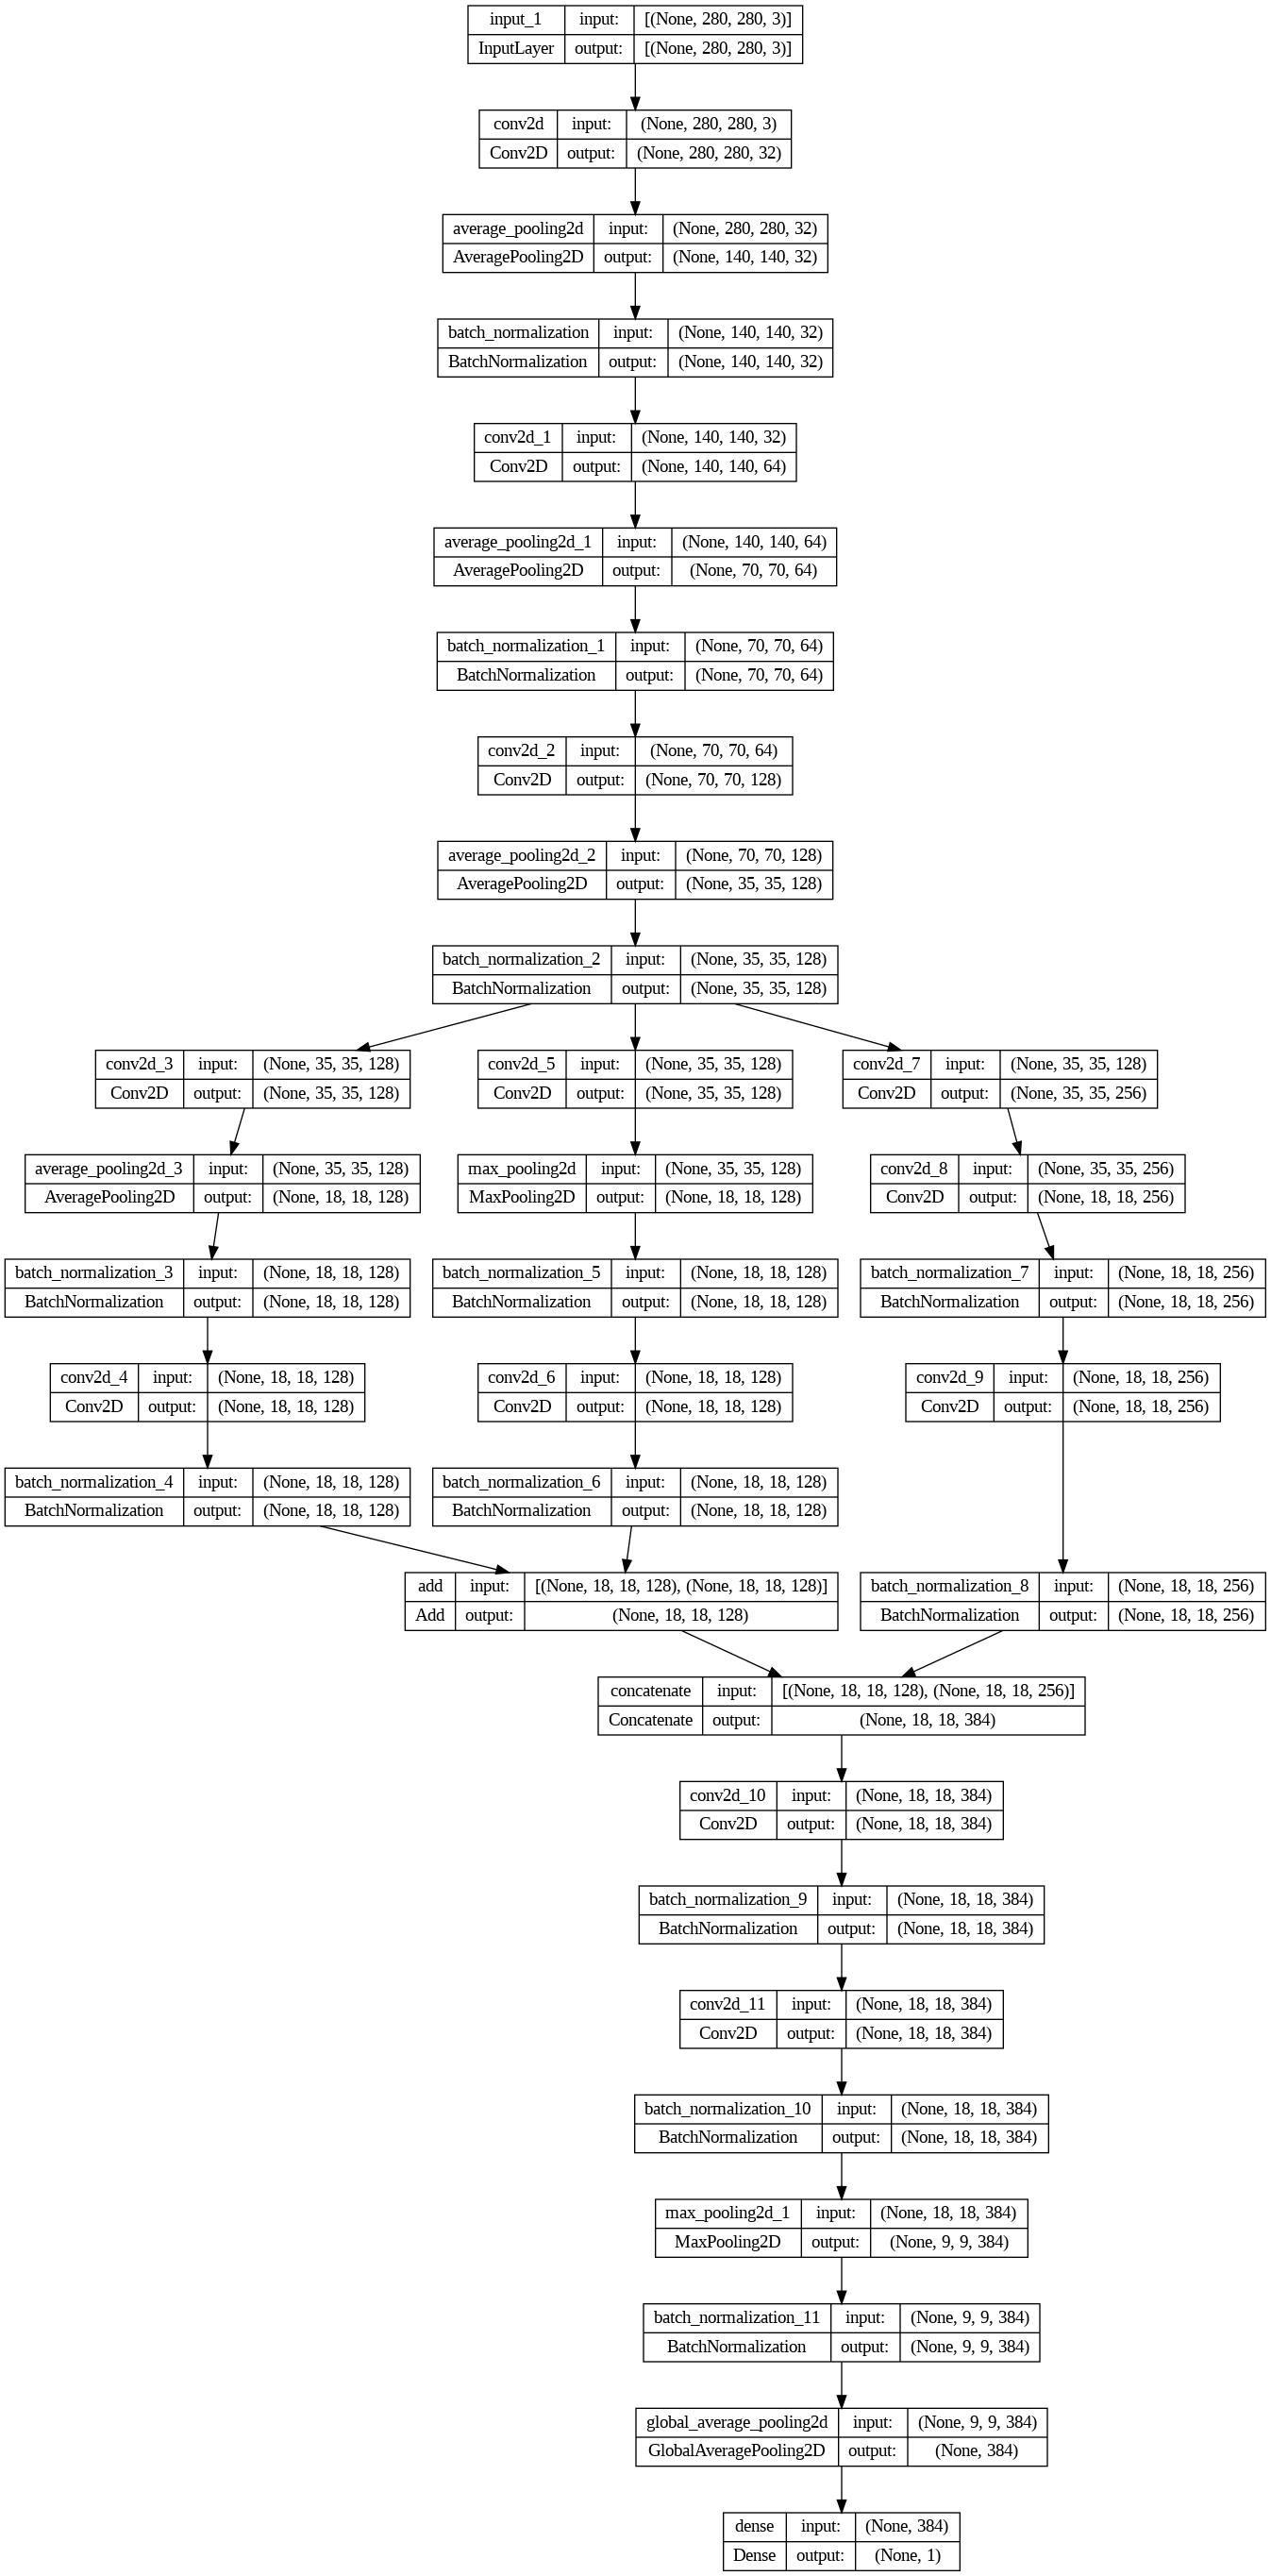

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

#### 2) 학습
* EarlyStopping 설정하고 학습시키기

In [ ]:
model.fit(x_train,y_train,validation_data=(x_valid,y_valid),callbacks=[es,lr],verbose=1,epochs=1000,batch_size=8)

Epoch 1/1000
49/49 [==============================] - 11s 74ms/step - loss: 0.8290 - accuracy: 0.7216 - val_loss: 4.6678 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/1000
49/49 [==============================] - 3s 53ms/step - loss: 0.4609 - accuracy: 0.8119 - val_loss: 7.1615 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/1000
49/49 [==============================] - 2s 51ms/step - loss: 0.4594 - accuracy: 0.8144 - val_loss: 4.3116 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/1000
49/49 [==============================] - 2s 51ms/step - loss: 0.4263 - accuracy: 0.8093 - val_loss: 1.5751 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/1000
49/49 [==============================] - 2s 51ms/step - loss: 0.4243 - accuracy: 0.8170 - val_loss: 2.8637 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/1000
49/49 [==============================] - 3s 53ms/step - loss: 0.4166 - accuracy: 0.8119 - val_loss: 2.2498 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/1000
49/49 [==============================] - 3s 54ms/s

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 1s 129ms/step - loss: 0.4056 - accuracy: 0.8347


[0.4056062698364258, 0.8347107172012329]

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>=0.5,1,0)

4/4 [==============================] - 0s 57ms/step


In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[49 11]
 [ 9 52]]
0.8524590163934426
0.8387096774193549
0.8347107438016529


In [ ]:
model.fit(train_generator,validation_data=(x_valid,y_valid1),callbacks=[es,lr],verbose=1,epochs=100,batch_size=8)

Epoch 1/100
49/49 [==============================] - 114s 2s/step - loss: 0.9760 - accuracy: 0.6856 - val_loss: 4.7274 - val_accuracy: 0.4896 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 22s 439ms/step - loss: 0.5138 - accuracy: 0.7732 - val_loss: 2.2454 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 21s 426ms/step - loss: 0.5121 - accuracy: 0.7423 - val_loss: 2.7545 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 22s 440ms/step - loss: 0.5401 - accuracy: 0.7371 - val_loss: 3.4609 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
49/49 [==============================] - 20s 417ms/step - loss: 0.5249 - accuracy: 0.7268 - val_loss: 2.0324 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/100
49/49 [==============================] - 22s 437ms/step - loss: 0.4580 - accuracy: 0.7861 - val_loss: 2.0697 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/100
49/49 [==============================] - 22s 439

#### 3) test set으로 예측하고 평가하기
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
model.evaluate(x_test,y_test1)

4/4 [==============================] - 1s 64ms/step - loss: 0.4394 - accuracy: 0.8512


[0.43941447138786316, 0.8512396812438965]

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>=0.5,1,0)

4/4 [==============================] - 0s 46ms/step


In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score
print(confusion_matrix(y_test1,y_pred))
print(recall_score(y_test1,y_pred))
print(f1_score(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred))

[[47 14]
 [ 4 56]]
0.9333333333333333
0.8615384615384616
0.8512396694214877


## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
            - ImageDataGenerator를 사용합니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.
            - VGG16(이미지넷)을 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * image generator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img_size = 280 ## 사이즈 조정 가능

train_path = dataset_path+'Car_Images_train/'
valid_path = dataset_path+'Car_Images_val/'
test_path = dataset_path+'Car_Images_test/'

#### 1) ImageGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=30,      
                         width_shift_range=0.25,  
                         height_shift_range=0.25, 
                         zoom_range=0.2,        
                         shear_range=0.2,        
                         horizontal_flip=True,   
                         vertical_flip=True,
                         rescale = 1/255,     
                         fill_mode='nearest')    
# train_datagen.fit(x_train)
valid_datagen = ImageDataGenerator(rotation_range=30,      
                         width_shift_range=0.25,  
                         height_shift_range=0.25,
                         zoom_range=0.2,         
                         shear_range=0.2,       
                         horizontal_flip=True,   
                         vertical_flip=True,
                         rescale = 1/255,            
                         fill_mode='nearest')    
# valid_datagen.fit(x_valid)

In [ ]:
test_datagen = ImageDataGenerator(rotation_range=30,      
                         width_shift_range=0.25,  
                         height_shift_range=0.25,
                         zoom_range=0.2,         
                         shear_range=0.2,       
                         horizontal_flip=True,   
                         vertical_flip=True,
                         rescale = 1/255,            
                         fill_mode='nearest')
test_generator = valid_datagen.flow_from_directory(directory=test_path,
                                                    target_size=(280,280),
                                                    class_mode="binary",
                                                    shuffle=False)

Found 121 images belonging to 2 classes.


In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### 2) 경로로 부터 이미지 불러 올 준비
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고, 
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


In [ ]:
train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                    target_size=(280,280),
                                                    class_mode="binary",
                                                    shuffle=True)

valid_generator = valid_datagen.flow_from_directory(directory=valid_path,
                                                    target_size=(280,280),
                                                    class_mode="binary",
                                                    shuffle=False)


Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)
print(valid_generator.class_indices)
print(test_generator.class_indices)

{'abnormal': 0, 'normal': 1}
{'abnormal': 0, 'normal': 1}
{'abnormal': 0, 'normal': 1}


#### 3) 학습
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 train_generator 이용. 
    - validation_data = valid_generator 지정
    - Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

* 구조 설계

* 학습
    * EarlyStopping 설정하기
    * 학습 데이터에 train_generator, validation_data=valid_generator 사용

In [ ]:
model.fit(train_generator,validation_data=valid_generator,callbacks=[es,lr],verbose=1,epochs=1000)

Epoch 1/1000
49/49 [==============================] - 157s 3s/step - loss: 3.5395 - accuracy: 0.6237 - val_loss: 351.7864 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/1000
49/49 [==============================] - 30s 604ms/step - loss: 0.9096 - accuracy: 0.6598 - val_loss: 15.9189 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/1000
49/49 [==============================] - 29s 599ms/step - loss: 0.6785 - accuracy: 0.7242 - val_loss: 1.6680 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/1000
49/49 [==============================] - 34s 692ms/step - loss: 0.9324 - accuracy: 0.6598 - val_loss: 5.9921 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/1000
49/49 [==============================] - 29s 597ms/step - loss: 0.6996 - accuracy: 0.7474 - val_loss: 1.3878 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/1000
49/49 [==============================] - 29s 584ms/step - loss: 0.6415 - accuracy: 0.6856 - val_loss: 3.3411 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/1000
49/49 [==============================]

#### 4) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
model.evaluate(test_generator)

16/16 [==============================] - 33s 2s/step - loss: 0.4728 - accuracy: 0.7603


[0.47280439734458923, 0.7603305578231812]

In [ ]:
y_pred = model.predict(test_generator)
y_pred = np.where(y_pred>=0.5,1,0)

16/16 [==============================] - 7s 421ms/step


In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score
print(confusion_matrix(test_generator.classes,y_pred))
print(recall_score(test_generator.classes,y_pred))
print(f1_score(test_generator.classes,y_pred))
print(accuracy_score(test_generator.classes,y_pred))

[[46 15]
 [ 6 54]]
0.9
0.8372093023255814
0.8264462809917356


In [ ]:
test_generator.classes==y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
#필요한 모듈을 import 합니다.
from numba import cuda

#이후 초기화 작업을 진행해줍니다.
device = cuda.get_current_device()
device.reset()

import torch, gc
gc.collect()
torch.cuda.empty_cache()

### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다. 
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionResNetV2

#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 True로 설정하여 모델의 모든 레이어들이 fine-tuning에 대해 업데이트되도록 합니다.


In [29]:
base_model = InceptionResNetV2(weights='imagenet',include_top=False,input_shape= (280,280,3))

In [ ]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 280, 280, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 139, 139, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 139, 139, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                               

In [30]:
for idx, layer in enumerate(base_model.layers) :
    layer.trainable = True

#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

In [34]:
keras.backend.clear_session()

new_output = keras.layers.GlobalAveragePooling2D()(base_model.output)
new_output = keras.layers.Dense(1,activation = 'sigmoid')(new_output)

model = keras.models.Model(base_model.inputs,new_output)
model.compile(loss=keras.losses.binary_crossentropy,metrics=["accuracy"],optimizer="adam")

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 280, 280, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 139, 139, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 139, 139, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        * Image Generator를 연결하거나
        * 기존 train, validation 셋을 이용해도 됩니다.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

In [35]:
model.fit(x_train,y_train,validation_data=(x_valid,y_valid),callbacks=[es,lr],verbose=1,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 104s 1s/step - loss: 0.2655 - accuracy: 0.9175 - val_loss: 4629.1094 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/1000
13/13 [==============================] - 11s 859ms/step - loss: 0.1702 - accuracy: 0.9201 - val_loss: 28531.6465 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/1000
13/13 [==============================] - 12s 945ms/step - loss: 0.0806 - accuracy: 0.9742 - val_loss: 252.4296 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/1000
13/13 [==============================] - 12s 901ms/step - loss: 0.1390 - accuracy: 0.9562 - val_loss: 4.0338 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 5/1000
13/13 [==============================] - 11s 887ms/step - loss: 0.0616 - accuracy: 0.9794 - val_loss: 22.7545 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/1000
13/13 [==============================] - 11s 886ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 16.1791 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 7/1000
13/13 [=======================

#### 4) 성능 평가

In [ ]:
model.evaluate(test_generator, batch_size=1024)

4/4 [==============================] - 43s 14s/step - loss: 0.0944 - accuracy: 0.9587


[0.09441714733839035, 0.9586777091026306]

In [36]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>=0.5,1,0)

4/4 [==============================] - 4s 256ms/step


In [37]:
from sklearn.metrics import recall_score,f1_score,accuracy_score

In [38]:
print(confusion_matrix(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[56  4]
 [ 7 54]]
0.8852459016393442
0.9075630252100839
0.9090909090909091


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Datasets/model_save.h5')

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>=0.5,1,0)
# y_test1 = np.where(y_test==0,1,0)

4/4 [==============================] - 8s 798ms/step


In [ ]:
from sklearn.metrics import recall_score,f1_score,accuracy_score
print(confusion_matrix(y_test1,y_pred))
print(recall_score(y_test1,y_pred))
print(f1_score(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred))

[[59  2]
 [ 0 60]]
1.0
0.9836065573770492
0.9834710743801653


In [ ]:
model.evaluate(x_test,y_test1)

4/4 [==============================] - 4s 247ms/step - loss: 0.0449 - accuracy: 0.9835


[0.044949304312467575, 0.9834710955619812]

In [ ]:
test_generator.class_indices

{'abnormal': 0, 'normal': 1}

In [ ]:
def plot_confusion_matrix(ax, matrix, labels = ['abnormal','normal'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

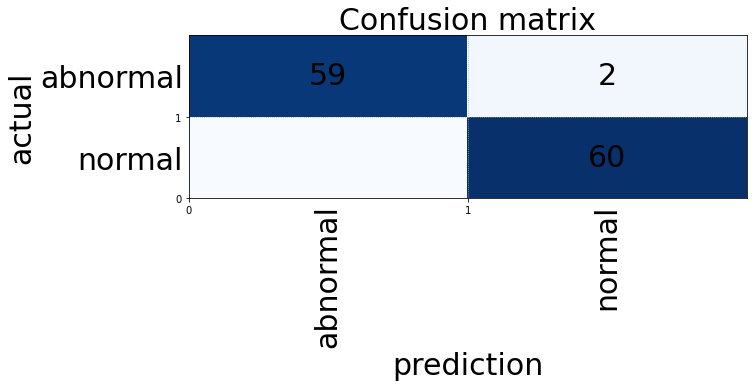

In [ ]:
import matplotlib.pyplot as plt
confusion = confusion_matrix(y_test1, y_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(280,280,3))
cl = keras.layers.Conv2D(filters=32,kernel_size=(2,2),strides=(2,2),padding="same",activation="relu")(il)
bl = keras.layers.BatchNormalization()(cl)
cl2 = keras.layers.Conv2D(filters=32,kernel_size=(2,2),padding="valid",activation="relu")(bl)
bl2 = keras.layers.BatchNormalization()(cl2)
cl3 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(bl2)
bl3 = keras.layers.BatchNormalization()(cl3)
pl = keras.layers.MaxPool2D(pool_size=(2,2))(bl3)
cl4 = keras.layers.Conv2D(filters=80,kernel_size=(3,3),padding="same",activation="relu")(pl)
bl4 = keras.layers.BatchNormalization()(cl4)
cl5 = keras.layers.Conv2D(filters=192,kernel_size=(2,2),padding="valid",activation="relu")(bl4)
pl2 = keras.layers.MaxPool2D(pool_size=(2,2))(cl5)

a = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(pl2)
a2 = keras.layers.BatchNormalization()(a)
a3 = keras.layers.Conv2D(filters=96,kernel_size=(3,3),padding="same",activation="relu")(a2)
a4 = keras.layers.BatchNormalization()(a3)
a5 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(a4)
a6 = keras.layers.BatchNormalization()(a5)

b = keras.layers.Conv2D(filters=48,kernel_size=(3,3),padding="same",activation="relu")(pl2)
b2 = keras.layers.BatchNormalization()(b)
b3 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(b2)
b4 = keras.layers.BatchNormalization()(b3)

c = keras.layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding="same")(pl2)
c2 = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(c)
c3 = keras.layers.BatchNormalization()(c2)

d = keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(pl2)
d2 = keras.layers.BatchNormalization()(d)

Add = keras.layers.Add()([a6,b4,c3,d2])
con = keras.layers.Concatenate()([a6,b4,c3,d2])

con2 = keras.layers.Concatenate()([Add,con])

aver = keras.layers.GlobalAveragePooling2D()(con2)

ol = keras.layers.Dense(1,activation = "sigmoid")(aver)



model = keras.models.Model(il,ol)
model.compile(loss=keras.losses.binary_crossentropy,metrics=["accuracy"],optimizer="adam")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 280, 280, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 140, 140, 32  416         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 140, 140, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

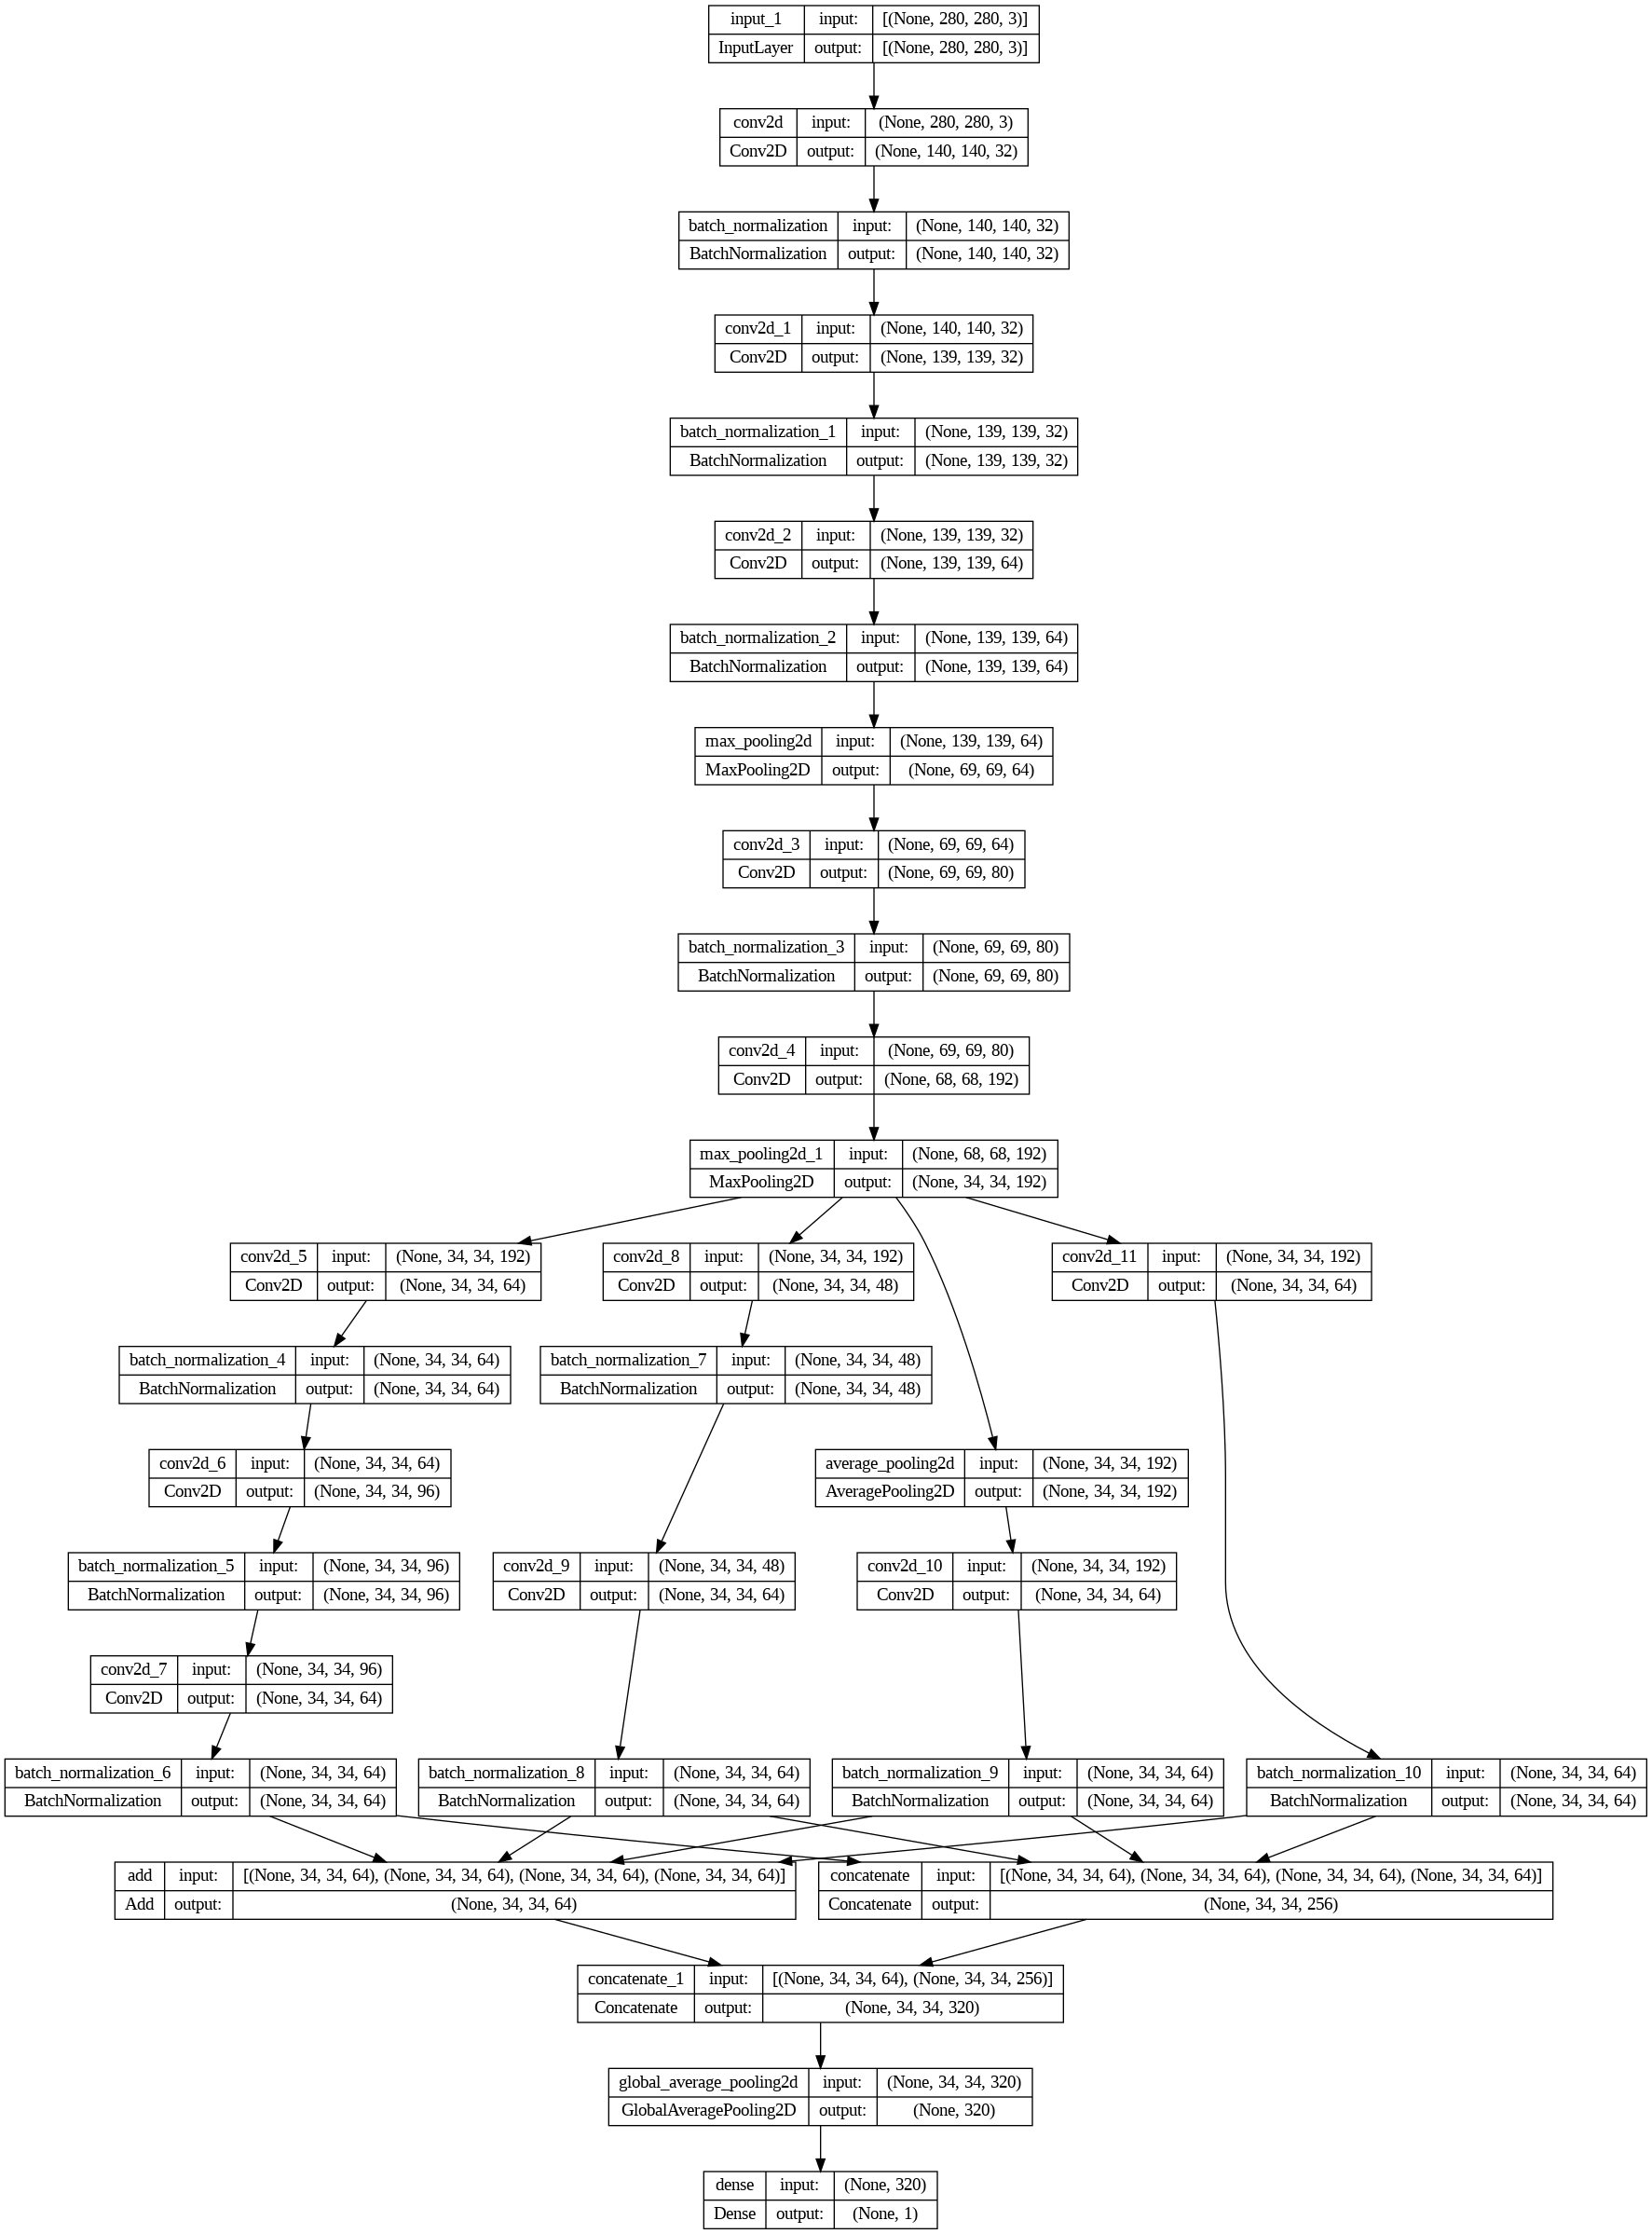

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   patience=11,
                   verbose=1,
                   restore_best_weights=True)
lr = ReduceLROnPlateau(monitor="val_loss",
                       patience=5,
                       factor=0.35,
                       verbose=1,
                       min_lr=0.0000001)

In [24]:
history=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),callbacks=[es,lr],verbose=1,epochs=100,batch_size=8)

Epoch 1/100
49/49 [==============================] - 22s 80ms/step - loss: 0.5816 - accuracy: 0.7448 - val_loss: 1.1321 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
49/49 [==============================] - 2s 45ms/step - loss: 0.5125 - accuracy: 0.7526 - val_loss: 1.8334 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
49/49 [==============================] - 2s 42ms/step - loss: 0.4012 - accuracy: 0.8402 - val_loss: 1.0471 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
49/49 [==============================] - 2s 42ms/step - loss: 0.4254 - accuracy: 0.8170 - val_loss: 1.7028 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/100
49/49 [==============================] - 2s 42ms/step - loss: 0.3825 - accuracy: 0.8402 - val_loss: 0.8642 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 6/100
49/49 [==============================] - 2s 45ms/step - loss: 0.4011 - accuracy: 0.8479 - val_loss: 1.0128 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/100
49/49 [==============================] - 2s 43ms/step - l

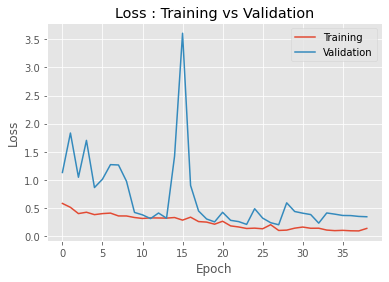

In [72]:
import matplotlib.pyplot as plt
if not isinstance(history, dict):
    history = history.history

plt.style.use("ggplot")
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

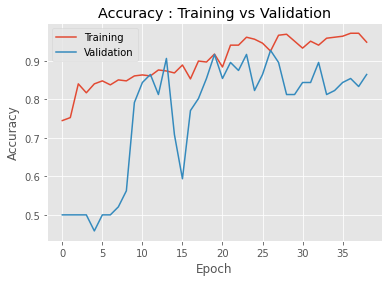

In [71]:
if not isinstance(history, dict):
    history = history.history

plt.style.use("ggplot")
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [28]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

# pred_test

4/4 [==============================] - 1s 288ms/step


array([[1.67349316e-02],
       [5.31675704e-02],
       [5.01129404e-02],
       [2.56626197e-04],
       [5.66903472e-01],
       [1.66649655e-01],
       [2.62449437e-04],
       [1.57185048e-01],
       [1.98624521e-01],
       [4.19104248e-02],
       [3.08938235e-01],
       [8.76605604e-03],
       [9.61544693e-01],
       [1.29180402e-02],
       [1.05231605e-01],
       [5.88583723e-02],
       [3.12198997e-02],
       [5.38658142e-01],
       [2.43344922e-02],
       [4.38323338e-03],
       [2.21662893e-04],
       [3.76832634e-02],
       [1.95455495e-02],
       [9.32466891e-03],
       [2.66730029e-04],
       [2.69621611e-03],
       [8.95548284e-01],
       [9.09391701e-01],
       [3.69391963e-03],
       [2.83707771e-02],
       [1.23853803e-01],
       [3.05942012e-05],
       [4.59461698e-05],
       [7.05878660e-02],
       [3.60367373e-02],
       [4.66829866e-01],
       [6.25738278e-02],
       [6.86949939e-02],
       [5.60512301e-03],
       [2.90296346e-01],


In [43]:
single_pred_train=[]
for i in pred_train:
    if i>=0.5:
        single_pred_train.append(1)
    else:
        single_pred_train.append(0)
single_pred_test= []
for i in pred_test:
    if i>=0.5:
        single_pred_test.append(1)
    else:
        single_pred_test.append(0)


In [62]:
y_pred = model.predict(x_test)
y_pred11 = np.where(y_pred>=0.5,1,0)
# y_pred = list(y_pred)

4/4 [==============================] - 0s 53ms/step


In [63]:
y_pred1 = []
for i in y_pred11:
    y_pred1.append(int(i))

실제 = normal
예측 = abnormal
모델이 예측한 확률(abnormal) = 56.69034719467163 %
모델이 예측한 확률(normal) = 43.30965280532837 %


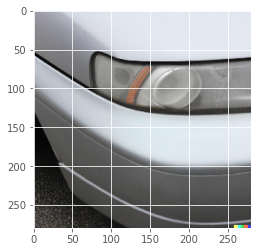


실제 = normal
예측 = abnormal
모델이 예측한 확률(abnormal) = 96.15446925163269 %
모델이 예측한 확률(normal) = 3.8455307483673096 %


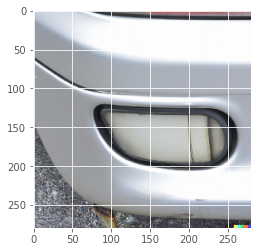


실제 = normal
예측 = abnormal
모델이 예측한 확률(abnormal) = 53.865814208984375 %
모델이 예측한 확률(normal) = 46.134185791015625 %


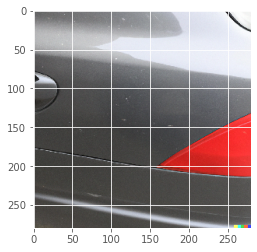


실제 = normal
예측 = abnormal
모델이 예측한 확률(abnormal) = 89.55482840538025 %
모델이 예측한 확률(normal) = 10.445171594619751 %


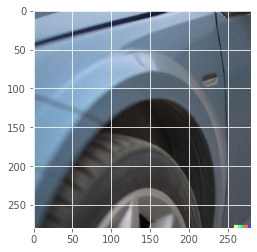


실제 = normal
예측 = abnormal
모델이 예측한 확률(abnormal) = 90.9391701221466 %
모델이 예측한 확률(normal) = 9.060829877853394 %


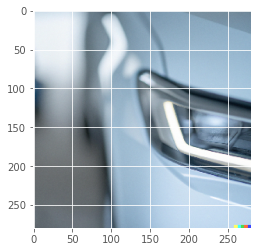


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 8.317255973815918 %
모델이 예측한 확률(normal) = 91.68274402618408 %


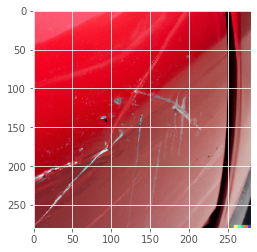


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 3.274264559149742 %
모델이 예측한 확률(normal) = 96.72573544085026 %


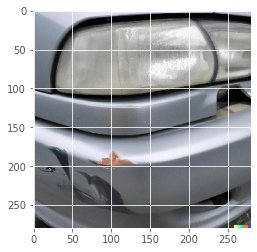


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 0.100656074937433 %
모델이 예측한 확률(normal) = 99.89934392506257 %


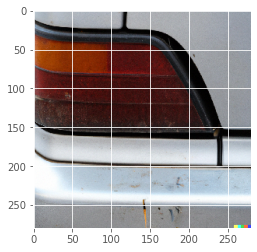


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 38.0840539932251 %
모델이 예측한 확률(normal) = 61.9159460067749 %


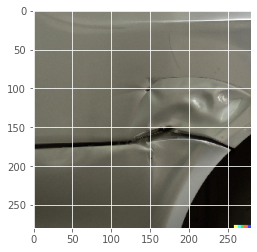


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 0.34092143177986145 %
모델이 예측한 확률(normal) = 99.65907856822014 %


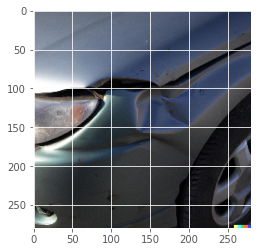


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 0.6002722308039665 %
모델이 예측한 확률(normal) = 99.39972776919603 %


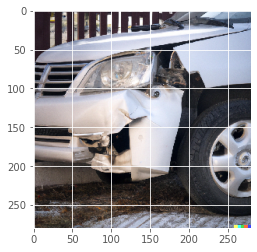


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 35.9269380569458 %
모델이 예측한 확률(normal) = 64.0730619430542 %


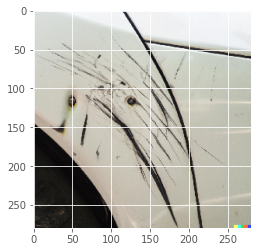


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 30.565840005874634 %
모델이 예측한 확률(normal) = 69.43415999412537 %


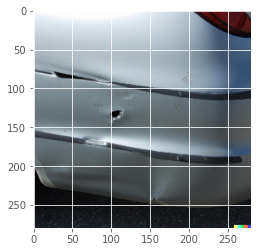


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 5.555626749992371 %
모델이 예측한 확률(normal) = 94.44437325000763 %


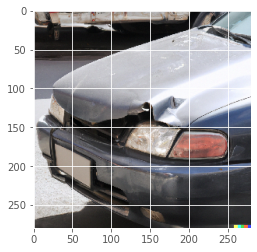


실제 = abnormal
예측 = normal
모델이 예측한 확률(abnormal) = 37.393733859062195 %
모델이 예측한 확률(normal) = 62.606266140937805 %


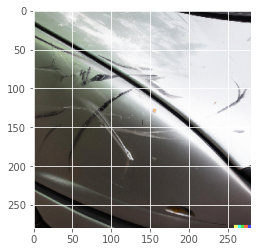

In [74]:
labels = { 0 : 'normal', 1 : 'abnormal'}
for i, j in enumerate(y_pred1):
    if j==y_test[i]:
        continue
    else:
        print("실제" ,"=", labels[y_test[i]])
        print("예측" ,"=", labels[y_pred1[i]])
        print("모델이 예측한 확률(abnormal)","=",y_pred[i][0]*100,"%")
        print("모델이 예측한 확률(normal)","=",100-(y_pred[i][0]*100),"%")
        plt.imshow(x_test[i].reshape([280,280,3]))
        plt.show()
        print()